# This is the fourth rendition of  HAR on 25 INDOOR CLASSES COLLECTED FROM STANFORD 40 ACTIONS AND MANUALLY ANNOTATED. (18+7)
*ONLY 18 USED HERE*


> AUTHOR: Shreya Akurathi


>Date of creation : 12/6/23








# Preprocessing and data loaders and DenseNet201, DenseNet121

In [ ]:
import numpy as np
import cv2, os
from sklearn.model_selection import train_test_split
from keras.layers import Input, Dense, Activation, Dropout, MaxPool2D, AveragePooling2D, Conv2D, GlobalAvgPool2D, Flatten, BatchNormalization
from keras.layers import ReLU
from keras.models import Model
np.random.seed(1337) # for reproducibility
from keras.optimizers import SGD
import random
import shutil
import glob

In [ ]:
from keras import backend as K
from keras.layers import Layer

--------------------


DENSENET201

In [ ]:
from google_drive_downloader import GoogleDriveDownloader as gdd
gdd.download_file_from_google_drive(file_id='1TdfOz-MVrA_XP8h8oXd8IBTvOXwbFN1Y',
                                    dest_path='/content/data.zip',
                                    unzip=True)


Unzipping...

/usr/local/lib/python3.10/dist-packages/google_drive_downloader/google_drive_downloader.py:78: UserWarning: Ignoring `unzip` since "1TdfOz-MVrA_XP8h8oXd8IBTvOXwbFN1Y" does not look like a valid zip file
  warnings.warn('Ignoring `unzip` since "{}" does not look like a valid zip file'.format(file_id))


In [ ]:
!git clone https://github.com/priyankasinghvi/CVStanford40


Cloning into 'CVStanford40'...
remote: Enumerating objects: 20, done.
remote: Total 20 (delta 0), reused 0 (delta 0), pack-reused 20
Unpacking objects: 100% (20/20), 482.65 KiB | 10.49 MiB/s, done.


In [ ]:
! pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"supritir0710","key":"7560b2da7673030e1e889f14f7fa6905"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d shreyaakuu/har40actions


 98% 106M/108M [00:07<00:00, 18.9MB/s]
100% 108M/108M [00:07<00:00, 14.8MB/s]


In [ ]:
! mkdir har1

In [ ]:
! unzip /content/har40actions.zip -d /content/har1/

Archive:  /content/har40actions.zip
  inflating: /content/har1/HARDATA_SHREYA/Washing Dishes/desktop.ini  
  inflating: /content/har1/HARDATA_SHREYA/Washing Dishes/washing_dishes_001.jpg  
  inflating: /content/har1/HARDATA_SHREYA/Washing Dishes/washing_dishes_002.jpg  
  inflating: /content/har1/HARDATA_SHREYA/Washing Dishes/washing_dishes_003.jpg  
  inflating: /content/har1/HARDATA_SHREYA/Washing Dishes/washing_dishes_004.jpg  
  inflating: /content/har1/HARDATA_SHREYA/Washing Dishes/washing_dishes_005.jpg  
  inflating: /content/har1/HARDATA_SHREYA/Washing Dishes/washing_dishes_006.jpg  
  inflating: /content/har1/HARDATA_SHREYA/Washing Dishes/washing_dishes_007.jpg  
  inflating: /content/har1/HARDATA_SHREYA/Washing Dishes/washing_dishes_008.jpg  
  inflating: /content/har1/HARDATA_SHREYA/Washing Dishes/washing_dishes_009.jpg  
  inflating: /content/har1/HARDATA_SHREYA/Washing Dishes/washing_dishes_010.jpg  
  inflating: /content/har1/HARDATA_SHREYA/Washing Dishes/washing_dishes_0

In [ ]:
#Label file:
data_path = '/content/har1/HARDATA_SHREYA'
classes = os.listdir(data_path)
decoder = {}
for i in range(len(classes)):
    decoder[classes[i]] = i
encoder = {}
for i in range(len(classes)):
    encoder[i] = classes[i]

In [ ]:
id = list()
path = '/content/har1/HARDATA_SHREYA'
for i in os.listdir(path):
  p1 = os.path.join(path,i)
  for j in os.listdir(p1):
    p2 = os.path.join(p1,j)
    id.append((i,p2))

In [ ]:
decoder

{'watching tv': 0,
 'reading': 1,
 'phoning': 2,
 'applauding': 3,
 'texting': 4,
 'taking photos': 5,
 'cleaning the floor': 6,
 'Washing Dishes': 7,
 'waving hands': 8,
 'drinking': 9,
 'writing on a board': 10,
 'brushing teeth': 11,
 'smoking': 12,
 '.ipynb_checkpoints': 13,
 'cooking': 14,
 'using a computer': 15,
 'pouring a liquid': 16,
 'cutting veggies': 17,
 'writing on a book': 18}

In [ ]:
id[:5]

[('watching tv',
  '/content/har1/HARDATA_SHREYA/watching tv/watching_TV_065.jpg'),
 ('watching tv',
  '/content/har1/HARDATA_SHREYA/watching tv/watching_TV_033.jpg'),
 ('watching tv',
  '/content/har1/HARDATA_SHREYA/watching tv/watching_TV_194.jpg'),
 ('watching tv',
  '/content/har1/HARDATA_SHREYA/watching tv/watching_TV_173.jpg'),
 ('watching tv',
  '/content/har1/HARDATA_SHREYA/watching tv/watching_TV_040.jpg')]

In [ ]:
!mkdir train

In [ ]:
!mkdir test

In [ ]:
data_path = '/content/har1/HARDATA_SHREYA/'
train_dir = '/content/train'
test_dir = '/content/test'
classes = os.listdir(data_path)
for class_name in classes:
    class_dir = os.path.join(data_path, class_name)
    if os.path.isdir(class_dir):
        file_paths = glob.glob(os.path.join(class_dir, '*.jpg'))
        random.shuffle(file_paths)
        split_index = int(0.8 * len(file_paths))
        train_paths = file_paths[:split_index]
        test_paths = file_paths[split_index:]
        for path in train_paths:
            destination_path = os.path.join(train_dir, class_name, os.path.basename(path))
            os.makedirs(os.path.dirname(destination_path), exist_ok=True)
            shutil.move(path, destination_path)
        for path in test_paths:
            destination_path = os.path.join(test_dir, class_name, os.path.basename(path))
            os.makedirs(os.path.dirname(destination_path), exist_ok=True)
            shutil.move(path, destination_path)



In [ ]:
train_dir = '/content/train'
test_dir = '/content/test'

In [ ]:
def count_files(directory):
    count = 0
    for root, dirs, files in os.walk(directory):
        count += len(files)
    return count

In [ ]:
train_counts = {}
for class_name in os.listdir(train_dir):
    class_dir = os.path.join(train_dir, class_name)
    if os.path.isdir(class_dir):
        count = count_files(class_dir)
        train_counts[class_name] = count
print("Train Directory Lengths:")
for class_name, count in train_counts.items():
    print(f"{class_name}: {count}")

Train Directory Lengths:
watching tv: 178
reading: 196
phoning: 207
applauding: 227
texting: 154
taking photos: 157
cleaning the floor: 169
Washing Dishes: 145
waving hands: 168
drinking: 204
writing on a board: 146
brushing teeth: 160
smoking: 192
cooking: 230
using a computer: 184
pouring a liquid: 160
cutting veggies: 145
writing on a book: 196


In [ ]:
test_counts = {}
for class_name in os.listdir(test_dir):
    class_dir = os.path.join(test_dir, class_name)
    if os.path.isdir(class_dir):
        count = count_files(class_dir)
        test_counts[class_name] = count
print("\nTest Directory Lengths:")
for class_name, count in test_counts.items():
    print(f"{class_name}: {count}")


Test Directory Lengths:
watching tv: 45
reading: 49
phoning: 52
applauding: 57
texting: 39
taking photos: 40
cleaning the floor: 43
Washing Dishes: 37
waving hands: 42
drinking: 52
writing on a board: 37
brushing teeth: 40
smoking: 49
cooking: 58
using a computer: 46
pouring a liquid: 40
cutting veggies: 37
writing on a book: 50


In [ ]:
# data_path = '/content/har1/HARDATA_SHREYA'
# classes = os.listdir(data_path)
# file_paths = []
# labels = []

In [ ]:
# for class_name in classes:
#     class_dir = os.path.join(data_path, class_name)
#     class_files = os.listdir(class_dir)
#     for file_name in class_files:
#         file_path = os.path.join(class_dir, file_name)
#         file_paths.append(file_path)
#         labels.append(class_name)
# train_file_paths, test_file_paths, train_labels, test_labels = train_test_split(file_paths, labels, test_size=0.2, random_state=42)
# print("train_len:", len(train_file_paths))
# print("test_len:", len(test_file_paths))


train_len: 3239
test_len: 810


In [ ]:
import os
import tensorflow as tf
from keras.models import Model
from keras.optimizers import Adam
from tensorflow.keras.applications import DenseNet201
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Dense, Dropout, Flatten
from pathlib import Path
import numpy as np
pp= tf.keras.applications.densenet.preprocess_input

In [ ]:
train_generator = ImageDataGenerator(rotation_range=23,
                                     width_shift_range=0.2, height_shift_range=0.2,


                                     validation_split=0.1,
                                     preprocessing_function=pp)

In [ ]:
test_generator = ImageDataGenerator(preprocessing_function=pp)

In [ ]:
traingen = train_generator.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               class_mode='categorical',
                                               subset='training',
                                               batch_size=64)

Found 2905 images belonging to 18 classes.


In [ ]:
testgen = test_generator.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             class_mode='categorical',
                                             batch_size=1,
                                             seed=42,
                                             shuffle = False
                                          )

Found 813 images belonging to 18 classes.


In [ ]:
validgen = train_generator.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               class_mode='categorical',
                                               subset='validation',
                                               batch_size=64)

Found 313 images belonging to 18 classes.


In [ ]:
validgen = train_generator.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               class_mode='categorical',
                                               subset='validation',
                                               batch_size=64)

Found 313 images belonging to 18 classes.


In [ ]:
validgen = train_generator.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               class_mode='categorical',
                                               subset='validation',
                                               batch_size=64)


Found 313 images belonging to 18 classes.


In [ ]:
def create_model(input_shape, n_classes, optimizer='rmsprop', fine_tune = 0 ):
    """
    Compiles a model integrated with VGG16 pretrained layers

    input_shape: tuple - the shape of input images (width, height, channels)
    n_classes: int - number of classes for the output layer
    optimizer: string - instantiated optimizer to use for training. Defaults to 'RMSProp'
    fine_tune: int - The number of pre-trained layers to unfreeze.
                If set to 0, all pretrained layers will freeze during training
    """

    # Pretrained convolutional layers are loaded using the Imagenet weights.
    # Include_top is set to False, in order to exclude the model's fully-connected layers.
    conv_base = DenseNet201(include_top=False,
                     weights='imagenet',
                     input_shape=input_shape)

    # Defines how many layers to freeze during training.
    # Layers in the convolutional base are switched from trainable to non-trainable
    # depending on the size of the fine-tuning parameter.
    if fine_tune > 0:
        for layer in conv_base.layers[:-fine_tune]:
            layer.trainable = False
    else:
        for layer in conv_base.layers:
            layer.trainable = False

    # Create a new 'top' of the model (i.e. fully-connected layers).
    # This is 'bootstrapping' a new top_model onto the pretrained layers.
    top_model = conv_base.output
    top_model = Flatten(name="flatten")(top_model)
    top_model = Dense(1024, activation='relu')(top_model)
    top_model = Dropout(0.5)(top_model)
    top_model = Dense(100, activation='relu')(top_model)
    output_layer = Dense(n_classes, activation='softmax')(top_model)

    # Group the convolutional base and new fully-connected layers into a Model object.
    model = Model(inputs=conv_base.input, outputs=output_layer)

    # Compiles the model for training.
    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

In [ ]:
input_shape = (224, 224, 3)
optim_1 = Adam(learning_rate=0.001)
n_classes=18

n_steps = traingen.samples // 64
n_val_steps = validgen.samples // 64
n_epochs = 50
dn2_model = create_model(input_shape, n_classes, optim_1, fine_tune=0)

74836368/74836368 [==============================] - 4s 0us/step


In [ ]:
pip install --upgrade livelossplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from livelossplot import PlotLossesKeras
from livelossplot.keras import PlotLossesCallback
import tensorflow as tf
print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.12.0


In [ ]:
from livelossplot.inputs.keras import PlotLossesCallback

plot_loss_1 = PlotLossesCallback()
tl_checkpoint_1 = ModelCheckpoint(filepath='tl_model_v1.weights.best.hdf5',
                                  save_best_only=True,
                                  verbose=1)
early_stop = EarlyStopping(monitor='val_loss',
                           patience=10,
                           restore_best_weights=True,
                           mode='min')

In [ ]:
dn2_model.summary(
)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                              

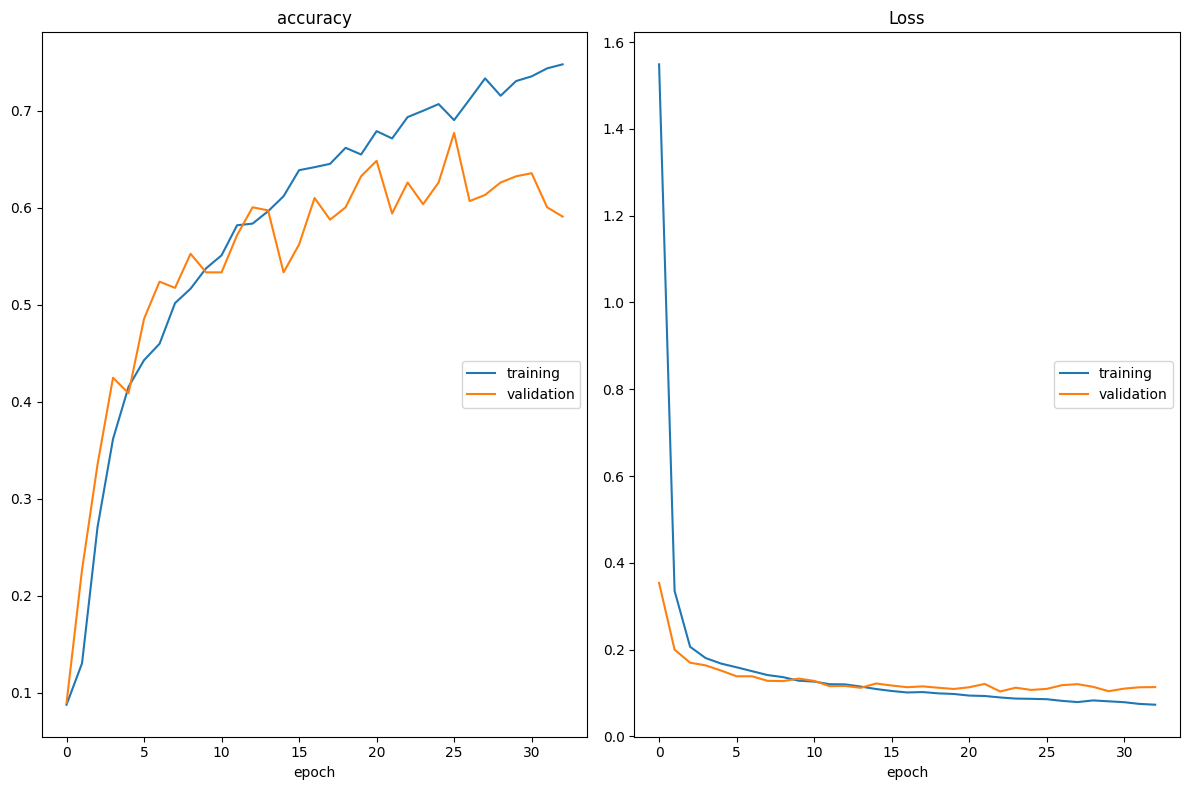

accuracy
	training         	 (min:    0.088, max:    0.748, cur:    0.748)
	validation       	 (min:    0.089, max:    0.677, cur:    0.591)
Loss
	training         	 (min:    0.073, max:    1.549, cur:    0.073)
	validation       	 (min:    0.104, max:    0.354, cur:    0.114)
46/46 [==============================] - 62s 1s/step - loss: 0.0731 - accuracy: 0.7480 - val_loss: 0.1137 - val_accuracy: 0.5911
CPU times: user 57min 31s, sys: 3min 10s, total: 1h 41s
Wall time: 40min 59s


In [ ]:
%%time

vgg_history = dn2_model.fit(traingen,
    validation_data = validgen,
    workers=10,
    epochs=50,
                            callbacks=[tl_checkpoint_1, early_stop,plot_loss_1])

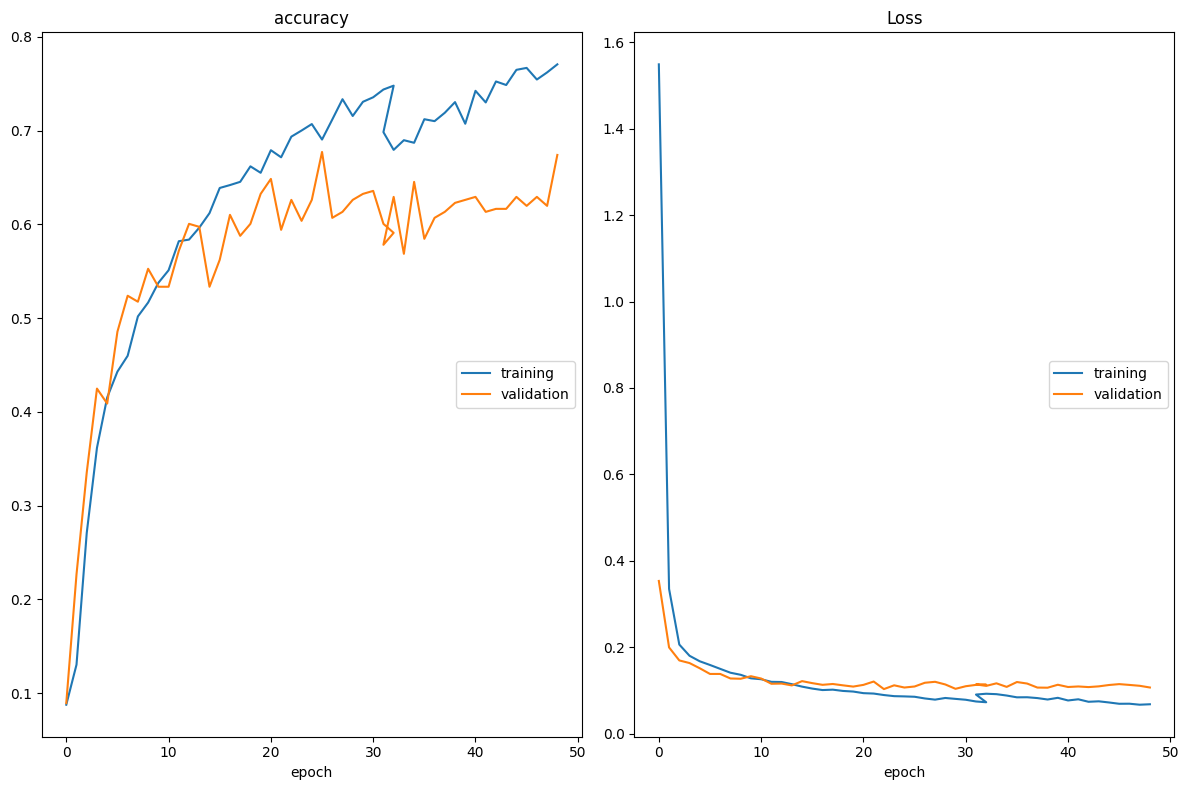

accuracy
	training         	 (min:    0.088, max:    0.771, cur:    0.771)
	validation       	 (min:    0.089, max:    0.677, cur:    0.674)
Loss
	training         	 (min:    0.067, max:    1.549, cur:    0.068)
	validation       	 (min:    0.104, max:    0.354, cur:    0.107)
46/46 [==============================] - 64s 1s/step - loss: 0.0685 - accuracy: 0.7707 - val_loss: 0.1072 - val_accuracy: 0.6741
CPU times: user 30min 45s, sys: 1min 30s, total: 32min 16s
Wall time: 21min 35s


In [ ]:
%%time

vgg_history = dn2_model.fit(traingen,
    validation_data = validgen,
    workers=10,
    epochs=50,
                            initial_epoch= 31,
                            callbacks=[tl_checkpoint_1, early_stop,plot_loss_1])

In [ ]:
dn2_model.load_weights('tl_model_v1.weights.best.hdf5')
true_classes = testgen.classes
class_indices = traingen.class_indices
class_indices = dict((v,k) for k,v in class_indices.items())
dn2_preds = dn2_model.predict(testgen)
dn2_pred_classes = np.argmax(dn2_preds, axis=1)

813/813 [==============================] - 24s 23ms/step


In [ ]:
from sklearn.metrics import accuracy_score
dn2_acc = accuracy_score(true_classes, dn2_pred_classes)
print("DenseNet201 Model Accuracy: {:.2f}%".format(dn2_acc * 100))

DenseNet201 Model Accuracy: 65.56%


Finetuned


In [ ]:
# Reset our image data generators
traingen.reset()
validgen.reset()
testgen.reset()

# Use a smaller learning rate
optim_2 = Adam(lr=0.0001)

# Re-compile the model, this time leaving the last 2 layers unfrozen for Fine-Tunin
dn2_model_ft = create_model(input_shape, n_classes, optim_2, fine_tune=100)

In [ ]:
dn2_model_ft.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_6 (ZeroPadding2  (None, 230, 230, 3)  0          ['input_4[0][0]']                
 D)                                                                                               
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d_6[0][0]']       
                                )                                                           

In [ ]:
tl_checkpoint_2 = ModelCheckpoint(filepath='tl_model_v2.weights.best.hdf5',
                                  save_best_only=True,
                                  verbose=1)

In [ ]:
tl_checkpoint_2 = ModelCheckpoint(filepath='tl_model_v2.weights.best.hdf5',
                                  save_best_only=True,
                                  verbose=1)

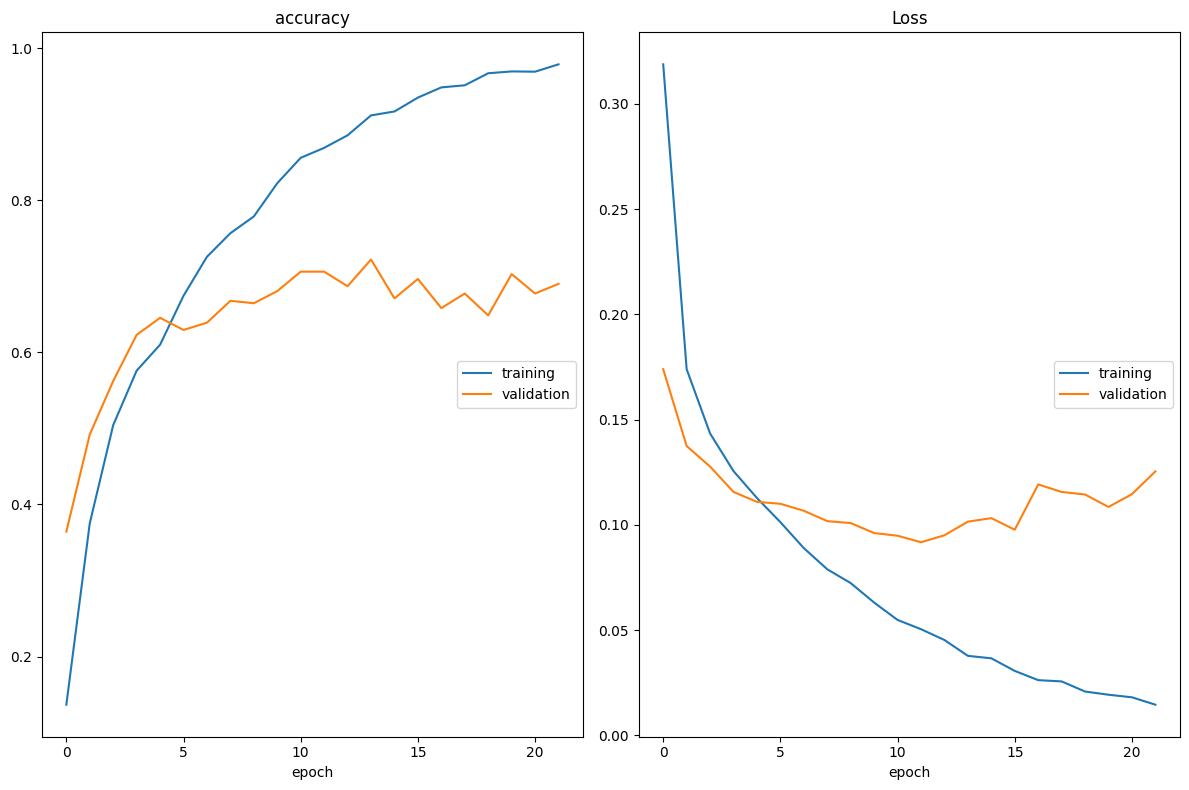

accuracy
	training         	 (min:    0.137, max:    0.979, cur:    0.979)
	validation       	 (min:    0.364, max:    0.722, cur:    0.690)
Loss
	training         	 (min:    0.015, max:    0.319, cur:    0.015)
	validation       	 (min:    0.092, max:    0.174, cur:    0.125)
46/46 [==============================] - 65s 1s/step - loss: 0.0146 - accuracy: 0.9787 - val_loss: 0.1254 - val_accuracy: 0.6901
CPU times: user 38min 30s, sys: 2min 21s, total: 40min 52s
Wall time: 32min 17s


In [ ]:
%%time
plot_loss_2 = PlotLossesCallback()
dn2_history_ft = dn2_model_ft.fit(traingen,
    validation_data = validgen,
    workers=10,
    epochs=50,
                            callbacks=[tl_checkpoint_2, early_stop,plot_loss_2])

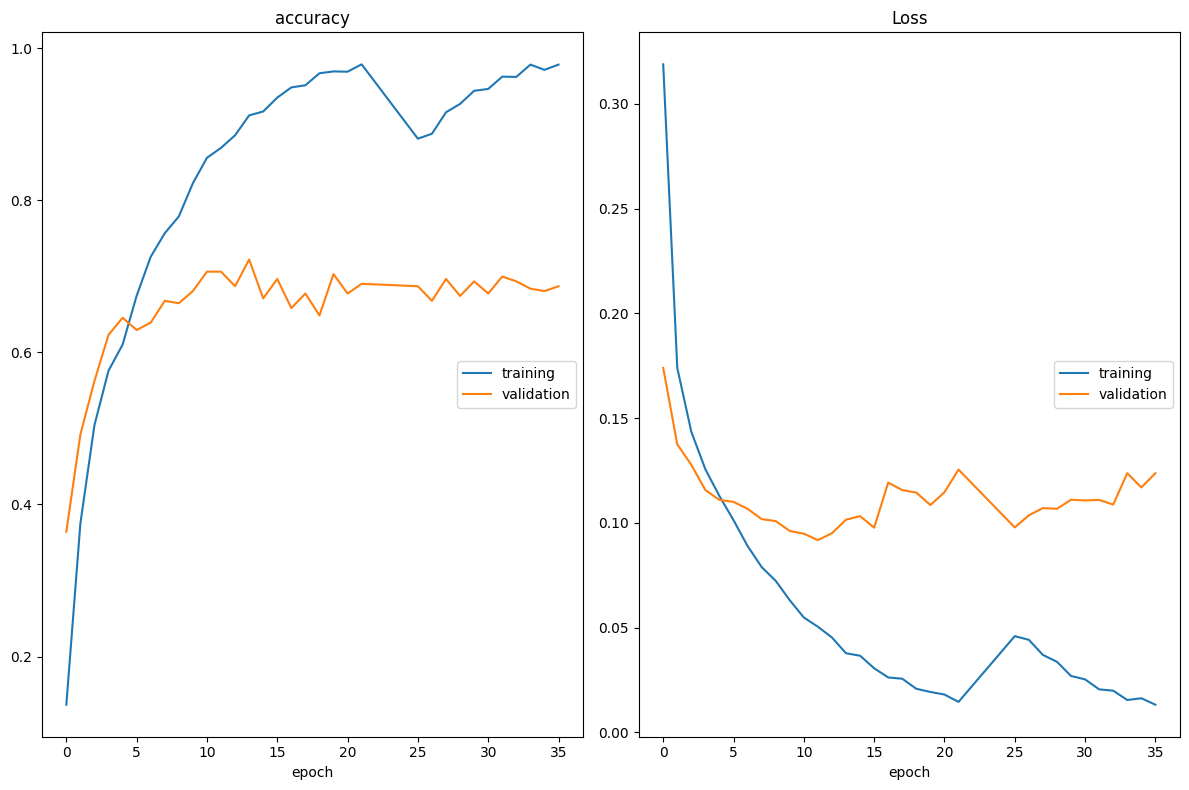

accuracy
	training         	 (min:    0.137, max:    0.979, cur:    0.978)
	validation       	 (min:    0.364, max:    0.722, cur:    0.687)
Loss
	training         	 (min:    0.013, max:    0.319, cur:    0.013)
	validation       	 (min:    0.092, max:    0.174, cur:    0.124)
46/46 [==============================] - 65s 1s/step - loss: 0.0132 - accuracy: 0.9783 - val_loss: 0.1237 - val_accuracy: 0.6869


In [ ]:

dn2_history_ft = dn2_model_ft.fit(traingen,
    validation_data = validgen,
    workers=10,
    epochs=50,
                          initial_epoch=25,  callbacks=[tl_checkpoint_2, early_stop,plot_loss_2])


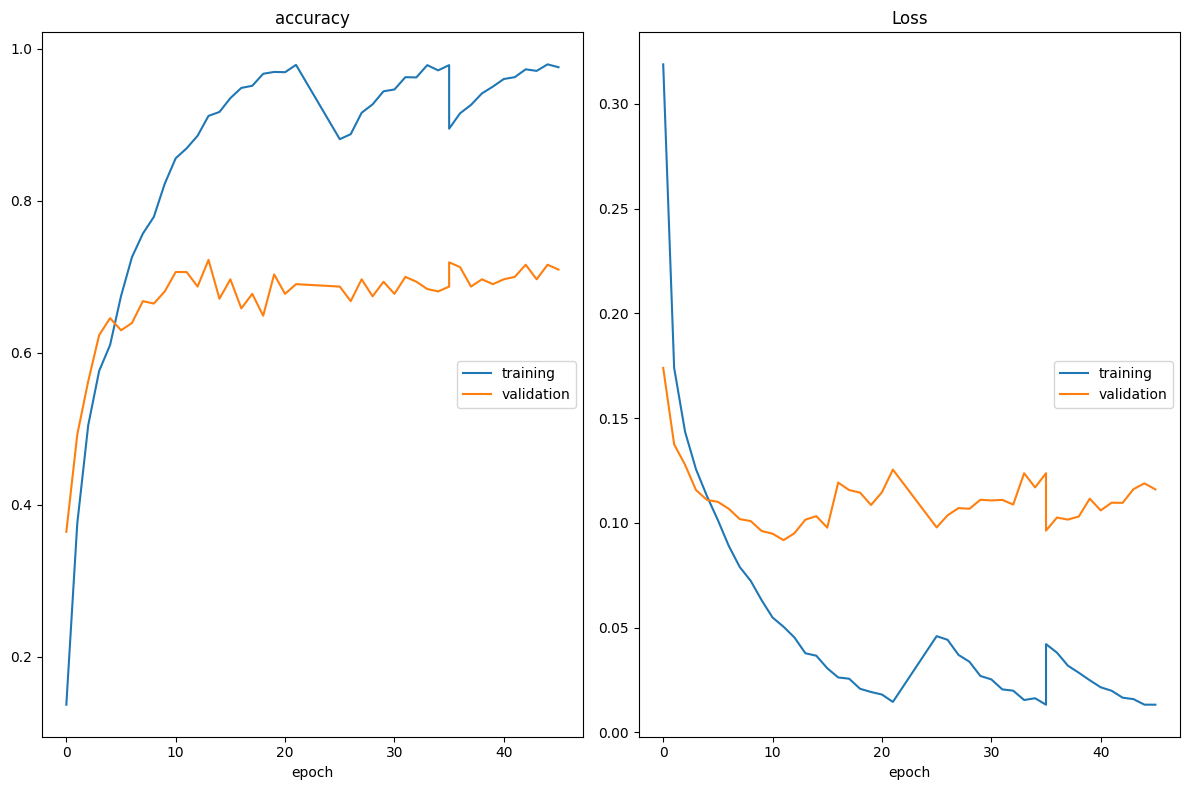

accuracy
	training         	 (min:    0.137, max:    0.979, cur:    0.976)
	validation       	 (min:    0.364, max:    0.722, cur:    0.709)
Loss
	training         	 (min:    0.013, max:    0.319, cur:    0.013)
	validation       	 (min:    0.092, max:    0.174, cur:    0.116)
46/46 [==============================] - 62s 1s/step - loss: 0.0132 - accuracy: 0.9756 - val_loss: 0.1160 - val_accuracy: 0.7093


In [ ]:
dn2_history_ft = dn2_model_ft.fit(traingen,
    validation_data = validgen,
    workers=10,
    epochs=50,
                                  initial_epoch=35,
                            callbacks=[tl_checkpoint_2, early_stop,plot_loss_2])

In [ ]:
# Generate prediction
dn2_model_ft.load_weights('tl_model_v2.weights.best.hdf5') # initialize the best trained weights
true_classes = testgen.classes
class_indices = traingen.class_indices
class_indices = dict((v,k) for k,v in class_indices.items())


dn2_preds_ft = dn2_model_ft.predict(testgen)
dn2_pred_classes_ft = np.argmax(dn2_preds_ft, axis=1)
from sklearn.metrics import accuracy_score

813/813 [==============================] - 23s 25ms/step


In [ ]:
dn2_acc_ft = accuracy_score(true_classes, dn2_pred_classes_ft)
print("VGG16 Model Accuracy with Fine-Tuning: {:.2f}%".format(dn2_acc_ft * 100))

VGG16 Model Accuracy with Fine-Tuning: 71.59%


cam

In [ ]:
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Multiply, Reshape

In [ ]:
def create_model_1(input_shape, n_classes, optimizer='rmsprop', fine_tune = 0 ):
    """
    Compiles a model integrated with VGG16 pretrained layers

    input_shape: tuple - the shape of input images (width, height, channels)
    n_classes: int - number of classes for the output layer
    optimizer: string - instantiated optimizer to use for training. Defaults to 'RMSProp'
    fine_tune: int - The number of pre-trained layers to unfreeze.
                If set to 0, all pretrained layers will freeze during training
    """

    # Pretrained convolutional layers are loaded using the Imagenet weights.
    # Include_top is set to False, in order to exclude the model's fully-connected layers.
    conv_base = DenseNet201(include_top=False,
                     weights='imagenet',
                     input_shape=input_shape)

    # Defines how many layers to freeze during training.
    # Layers in the convolutional base are switched from trainable to non-trainable
    # depending on the size of the fine-tuning parameter.
    if fine_tune > 0:
        for layer in conv_base.layers[:-fine_tune]:
            layer.trainable = False
    else:
        for layer in conv_base.layers:
            layer.trainable = False

  #cB


    # Add a channel attention module
    gap = GlobalAveragePooling2D()(conv_base.output)
    fc= Dense(960, activation='relu')(gap)
    #reshape = Reshape((1, 1, conv_base.output_shape[-1]))(gap)
    #fc1 = Dense(conv_base.output_shape[-1] // 8, activation='relu')(reshape)
    fc2 = Dense(conv_base.output_shape[-1], activation='sigmoid')(fc)
    attention = Multiply()([conv_base.output, fc2])

    # Add a global pooling layer
    global_pooling = GlobalAveragePooling2D()(attention)

    # Create a new 'top' of the model (i.e. fully-connected layers).
    # This is 'bootstrapping' a new top_model onto the pretrained layers.
    top_model = Flatten(name="flatten")(global_pooling)
    top_model = Dense(1024, activation='relu')(top_model)
    top_model = Dropout(0.5)(top_model)
    top_model = Dense(100, activation='relu')(top_model)
    output_layer = Dense(n_classes, activation='softmax')(top_model)

    # Group the convolutional base and new fully-connected layers into a Model object.
    model = Model(inputs=conv_base.input, outputs=output_layer)

    # Compiles the model for training.
    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

In [ ]:
input_shape = (224, 224, 3)
optim_1 = Adam(learning_rate=0.001)
n_classes=18

n_steps = traingen.samples // 64
n_val_steps = validgen.samples // 64
n_epochs = 50
fine_tune = 0

In [ ]:
# Reset our image data generators
traingen.reset()
validgen.reset()
testgen.reset()

# Use a smaller learning rate
optim_3 = Adam(lr=0.0001)

# Re-compile the model, this time leaving the last 2 layers unfrozen for Fine-Tuning
dn2_model_cab = create_model_1(input_shape, n_classes, optim_3, fine_tune=100)

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
dn2_model_cab.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_8 (ZeroPadding2  (None, 230, 230, 3)  0          ['input_5[0][0]']                
 D)                                                                                               
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d_8[0][0]']       
                                )                                                           

In [ ]:
tl_checkpoint_3 = ModelCheckpoint(filepath='tl_model_v3.weights.best.hdf5',
                                  save_best_only=True,
                                  verbose=1)

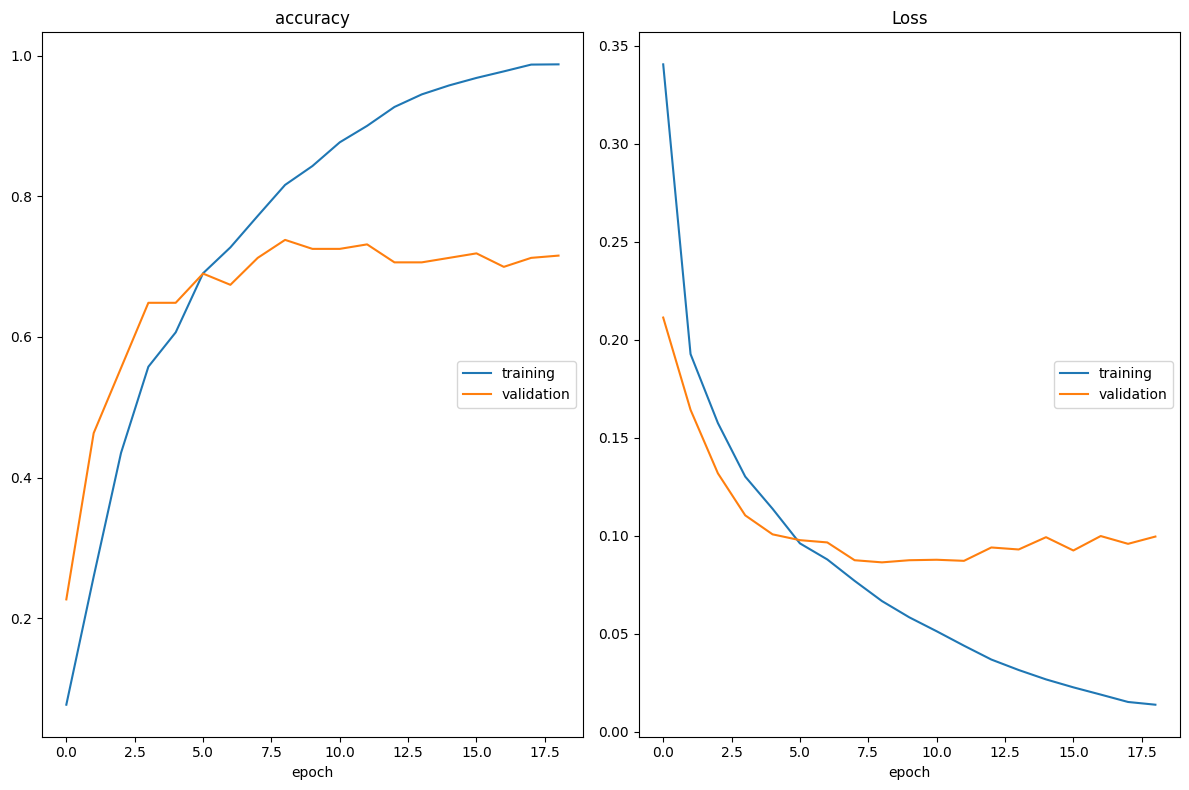

accuracy
	training         	 (min:    0.077, max:    0.988, cur:    0.988)
	validation       	 (min:    0.227, max:    0.738, cur:    0.716)
Loss
	training         	 (min:    0.014, max:    0.341, cur:    0.014)
	validation       	 (min:    0.086, max:    0.211, cur:    0.100)
46/46 [==============================] - 63s 1s/step - loss: 0.0138 - accuracy: 0.9876 - val_loss: 0.0996 - val_accuracy: 0.7157
CPU times: user 32min 56s, sys: 1min 37s, total: 34min 34s
Wall time: 22min 28s


In [ ]:
%%time
plot_loss_3 = PlotLossesCallback()

vgg_history_cab = dn2_model_cab.fit(traingen,
    validation_data = validgen,
    workers=10,
    epochs=50,
                            callbacks=[tl_checkpoint_3, early_stop,plot_loss_3])

In [ ]:
# Generate predictions
dn2_model_cab.load_weights('tl_model_v3.weights.best.hdf5') # initialize the best trained weights
true_classes = testgen.classes
class_indices = traingen.class_indices
class_indices = dict((v,k) for k,v in class_indices.items())


dn2_preds_CAB = dn2_model_cab.predict(testgen)
dn2_pred_classes_CAB = np.argmax(dn2_preds_CAB, axis=1)
from sklearn.metrics import accuracy_score

813/813 [==============================] - 31s 35ms/step


In [ ]:
dn2_acc_CAB = accuracy_score(true_classes, dn2_pred_classes_CAB)
print("VGG16 Model Accuracy with Fine-Tuning + CAM: {:.2f}%".format(dn2_acc_CAB * 100))

VGG16 Model Accuracy with Fine-Tuning + CAM: 72.82%


In [ ]:
import os
from keras.models import Model
from keras.optimizers import Adam
from keras.applications.DenseNet121 import DenseNet121, preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Dense, Dropout, Flatten
from pathlib import Path
import numpy as np

In [ ]:
traingen.reset()
validgen.reset()
testgen.reset()

In [ ]:
%%time

plot_loss_2 = PlotLossesCallback()

dn_ft_history = dn_model_ft.fit(traingen,
                                  batch_size=64,
                                  epochs=n_epochs,
                                  validation_data=validgen,
                                  steps_per_epoch=n_steps,
                                  validation_steps=n_val_steps,
                                  callbacks=[tl_checkpoint_1, early_stop, plot_loss_2],
                                  verbose=1)

In [ ]:
dn_model_ft.load_weights('tl_model_v1.weights.best.hdf5')
dn_preds_ft = dn_model_ft.predict(testgen)
dn_pred_classes_ft = np.argmax(dn_preds_ft, axis=1)

In [ ]:
dn_acc_ft = accuracy_score(true_classes, dn_pred_classes_ft)
print("DenseNet121 Model Accuracy: {:.2f}%".format(dn_acc_ft * 100))

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

class_names = testgen.class_indices.keys()

def plot_heatmap(y_true, y_pred, class_names, ax, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(
        cm,
        annot=True,
        square=True,
        xticklabels=class_names,
        yticklabels=class_names,
        fmt='d',
        cmap=plt.cm.Blues,
        cbar=False,
        ax=ax
    )
    ax.set_title(title, fontsize=16)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    ax.set_ylabel('True Label', fontsize=12)
    ax.set_xlabel('Predicted Label', fontsize=12)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10))
plot_heatmap(true_classes, dn2_pred_classes, class_names, ax2, title="DenseNet201")
plot_heatmap(true_classes, dn_pred_classes_ft, class_names, ax3, title="DenseNet121")

fig.suptitle("Confusion Matrix Model Comparison", fontsize=24)
fig.tight_layout()
fig.subplots_adjust(top=1.25)
plt.show()